# Demo 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import igraph as ig
import networkx as nx

In [2]:
from module import Models

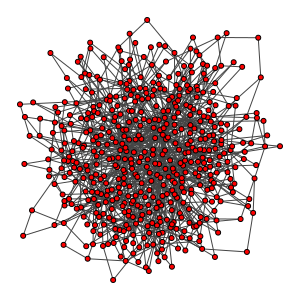

In [3]:
g=ig.Graph.Barabasi(500,2)
ig.plot(g,bbox=(300,300),vertex_size=5)

## Creamos el sitema de yard sale
* Pasamos topología de y factor de protección social

In [72]:
S=Models.YardSale(g,0.5)

* Riqueza y riesgo inicial

In [6]:
W=S.getWealths()
R=S.getRisks()

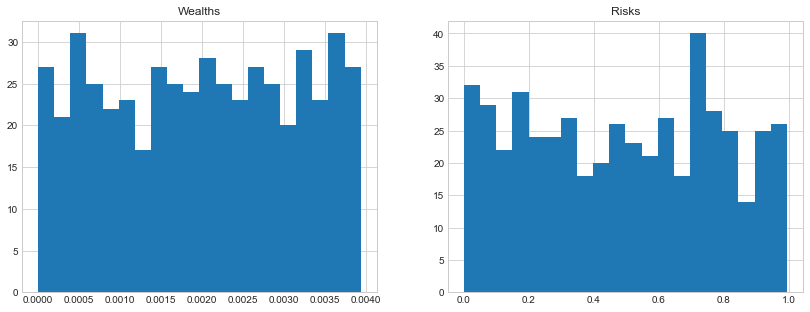

In [7]:
fig,Ax=plt.subplots(1,2,figsize=(14,5))

Ax[0].hist(W,bins=20)
Ax[0].set_title('Wealths')
Ax[1].hist(R,bins=20)
Ax[1].set_title('Risks')

plt.show()


* Evolucionar sistema

In [8]:
S.termalize(1000)

c:\ProgramData\Anaconda3\lib\site-packages\numba\cuda\compiler.py:726: NumbaPerformanceWarning: Grid size (1) < 2 * SM count (28) will likely result in GPU under utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Text(0.5, 1.0, 'Risks')

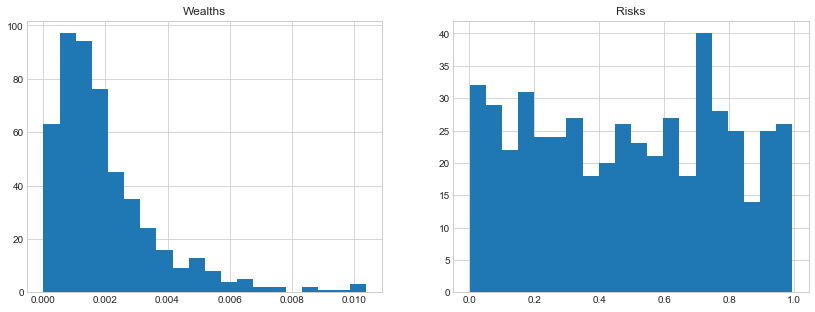

In [9]:
W=S.getWealths()
R=S.getRisks()

fig,Ax=plt.subplots(1,2,figsize=(14,5))

Ax[0].hist(W,bins=20)
Ax[0].set_title('Wealths')
Ax[1].hist(R,bins=20)
Ax[1].set_title('Risks')

plt.show()

* Podemos obtener las riquezas medias luegos de una epoca

In [10]:
W=S.epoch(1000)

c:\ProgramData\Anaconda3\lib\site-packages\numba\cuda\compiler.py:726: NumbaPerformanceWarning: Grid size (1) < 2 * SM count (28) will likely result in GPU under utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Text(0.5, 1.0, 'Mean Wealths')

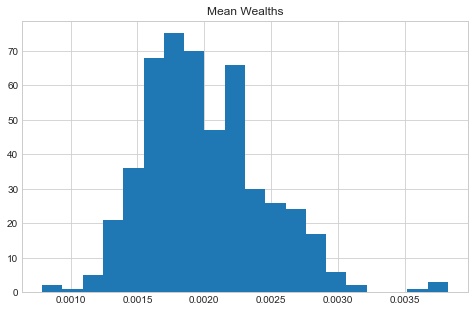

In [11]:
fig,ax=plt.subplots(1,1,figsize=(8,5))

ax.hist(W,bins=20);
ax.set_title('Mean Wealths')


* Podemos seguir a un agente particular en una determinada cantidad de pasos

In [12]:
Wi=S.follow(1000,agent=1)

c:\ProgramData\Anaconda3\lib\site-packages\numba\cuda\compiler.py:726: NumbaPerformanceWarning: Grid size (1) < 2 * SM count (28) will likely result in GPU under utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


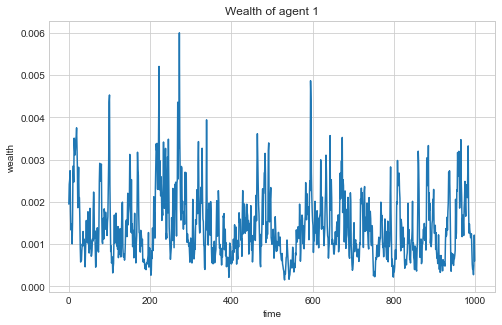

In [13]:
fig, ax=plt.subplots(1,1,figsize=(8,5))

ax.plot(Wi)
ax.set_title('Wealth of agent 1')
ax.set_xlabel('time')
ax.set_ylabel('wealth')

plt.show()

* Podemos pedirle coefficente de Gini

In [66]:
print(S.getGini())

[0.7840286  0.8368186  0.7895981  0.8580245  0.7836362  0.7309778
 0.828615   0.78438467 0.8047458  0.8372523 ]


* Podemos resetear el sistema

In [14]:
S.reset(wealth_type='equal',risk_type='homogeneous',r=0.5)

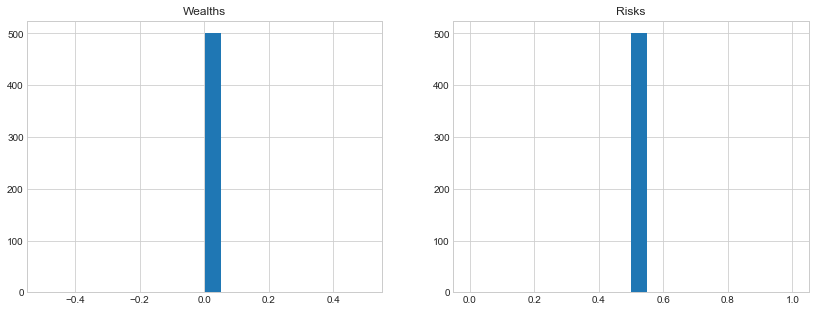

In [16]:
W=S.getWealths()
R=S.getRisks()

fig,Ax=plt.subplots(1,2,figsize=(14,5))

Ax[0].hist(W,bins=20)
Ax[0].set_title('Wealths')
Ax[1].hist(R,bins=20)
Ax[1].set_title('Risks')

plt.show()

* O modificar a gusto los parámetros de los agentes

In [28]:
S.setRisk([0,1,2,3,5,6,7,8,9,10],0.1)
S.setWealth([0,1,2,3,5,6,7,8,9,10],[0,.1,.2,.3,.5,.6,.7,.8,.9,1])

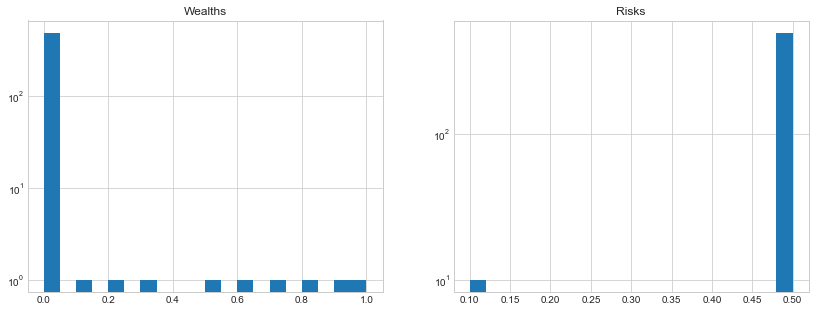

In [34]:
W=S.getWealths()
R=S.getRisks()

fig,Ax=plt.subplots(1,2,figsize=(14,5))

Ax[0].hist(W,bins=20)
Ax[0].set_title('Wealths')
Ax[0].set_yscale('log')
Ax[1].hist(R,bins=20)
Ax[1].set_title('Risks')
Ax[1].set_yscale('log')


plt.show()

* O modificar la estructura de contactos (esta falta implentar)

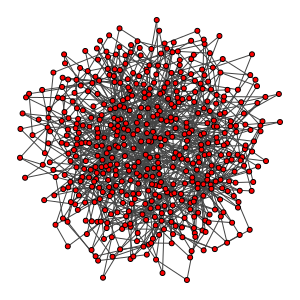

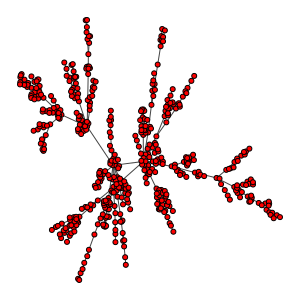

In [35]:
display(ig.plot(g,bbox=(300,300),vertex_size=5))
g=ig.Graph.Barabasi(500,1)
display(ig.plot(g,bbox=(300,300),vertex_size=5))

In [36]:
S.modifyGraph(g)

---
## Podemos poner varios modelos

* También se puede usar networkx

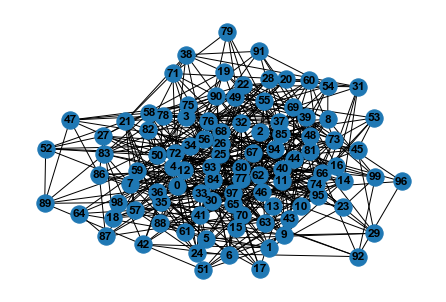

In [37]:
#make erdos renyi graph
G = nx.erdos_renyi_graph(100, 0.1)
#plot
nx.draw(G, with_labels=True, font_weight='bold')

### Creamos un Merger-Spinoff

In [73]:
S=Models.MergerSpinoff(G)

In [78]:
Gs=[nx.erdos_renyi_graph(500, 0.1) for i in range(10)]
S=Models.MergerSpinoff(Gs)

In [75]:
print(S.getGini())

[0.3425086  0.3435144  0.33308282 0.342417   0.3320338  0.33819947
 0.32768825 0.33154705 0.3359654  0.3256325 ]


In [95]:
S.termalize(10000)
W=S.getWealths()

Text(0.5, 1.0, 'Mean Wealths')

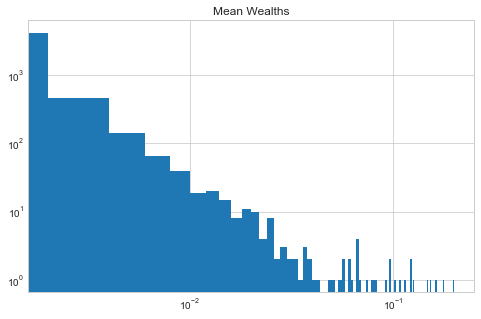

In [63]:
fig,ax=plt.subplots(1,1,figsize=(8,5))

ax.hist(W,bins=100);
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Mean Wealths')

c:\ProgramData\Anaconda3\lib\site-packages\numba\cuda\compiler.py:726: NumbaPerformanceWarning: Grid size (10) < 2 * SM count (28) will likely result in GPU under utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


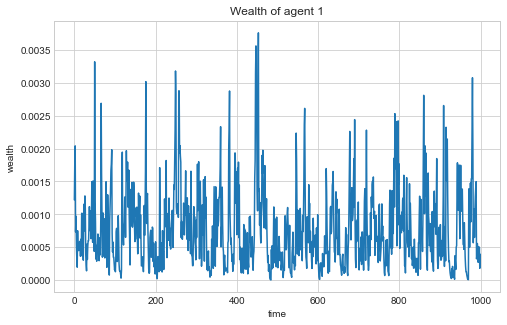

In [64]:
Wi=S.follow(1000,agent=1)

fig, ax=plt.subplots(1,1,figsize=(8,5))

ax.plot(Wi)
ax.set_title('Wealth of agent 1')
ax.set_xlabel('time')
ax.set_ylabel('wealth')

plt.show()